
 (a)
For a change in magnitude of 0.3,
the fractional change in luminosity will be 0.76

 (b)
The true mean of all magnitudes is 4.83
The mean of all magnitudes observable is 4.49
The fractional difference between them is 0.73

 (c)
The mean distance of all observable stars is 99.01
The mean distance with assumed uniform magnitudes is 2.73
The main error is in assuming I can see all the stars in the population.
 If I was actually able to see all the stars, assuming the constant 
 average magnitude would be reasonable.

 (d)
The true mean of all metallicities is 0.706
The mean of all observable metallicities is 0.728
The visible stars are more metallic than average.


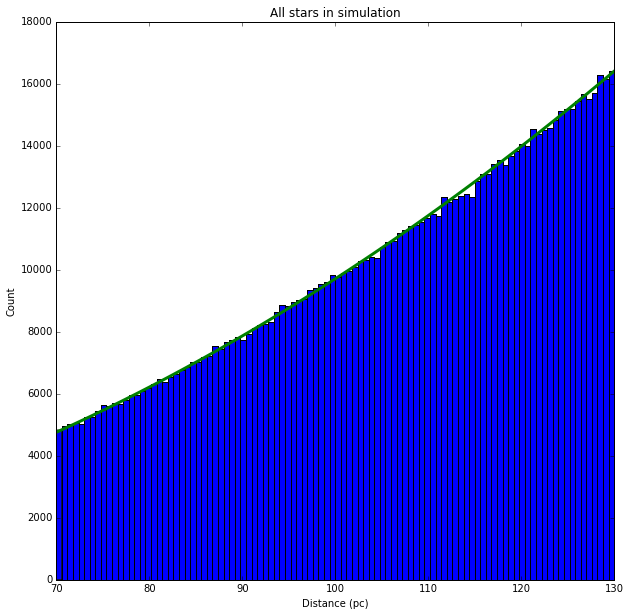

In [18]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456

Cordell Newmiller
Prof. Lubin
PHY 267
Homework 2
Problem 2

Here you will make a numerical model (i.e. a Monte Carlo simulation) 
describing both the distribution of stars and the way we observe them, to 
explore the Malmquist Bias. If we observe stars down to a fixed apparent 
brightness, we do not get a fair mixture of all the stars in the sky. Rather 
we include more of the most luminous stars.

(a) Your model sky consists of G-type stars in regions A (70 pc < d < 90 pc), 
B (90 pc < d <110 pc), and C (110 pc < d <130 pc). G stars do not all have 
exactly the same luminosity. If the variation corresponds to about 0.3 
magnitudes, what fractional change in luminosity is this?

(b) Assuming the density of stars is uniform, place a 1000+ stars randomly 
in space and choose an absolute magnitude from a Gaussian distribution with 
mean MV,⊙ = 4.83 and variance 0.3. To “observe” your sky, use a “telescope” 
that can only “see” stars brighter than apparent magnitude mV = 10; these are 
the stars in your sample. How different is their mean absolute magnitude from 
that for all the stars that you placed in the sky?

(c) What is the average distance of all the stars in your sample? Suppose you 
assumed that your sample stars each had the average luminosity for all the 
stars in your sky and then calculated their distances from their apparent 
magnitudes : what would you find for their average distance? In which sense 
would you make an error?

(d) Metal-poor main-sequence stars are bluer for a given luminosity, so they 
are fainter at a particular spectral type. If the star’s fraction by weight of 
heavy elements is Z, then ∆MV ≈ −0.87 log10(Z/Z⊙). Assume that the average 
metallicity is Z/Z⊙ = 0.6 with a variance of 0.1. For each of the stars in 
part (b), choose a Z/Z⊙ from this Gaussian distribution (simply ignore values 
of zero or less) and change the absolute magnitude by the resulting ∆MV . 
Observe the stars again with the same telescope. For your sample of stars, 
calculate the average Z of those that fall in regions B and C. Are these more 
or less metal-rich than all of the stars that you placed in the sky?

"""
import numpy
from matplotlib import pyplot
%matplotlib inline
numpy.seterr(all="ignore")

# (a) fractional change in luminosity = flux ratio
print('\n (a)')
FractionalLuminosityChange = 10**(-0.4*(0.3))
print('For a change in magnitude of 0.3,') 
print('the fractional change in luminosity will be',
      '{:.{s}f}'.format(FractionalLuminosityChange, s=2))

# (b) Model sky
print('\n (b)')

Rnear=70
Rfar=130
N=1000000
bincount=100

# To random sample by radius, the PDF will go as Ar^2, so the inverse CDF
# will go as Br^(1/3)

A = 1/((1/3)*(Rfar**3-Rnear**3))
B = (3/A)**(1/3)

Rstars =  B*(numpy.random.uniform(size=N)+(A/3)*(Rnear**3))**(1/3)

Rrange=numpy.arange(Rnear,Rfar+1)
Nexpected=((Rfar-Rnear)*N/bincount)*A*(Rrange**2)

figure1 = pyplot.figure(figsize=(10,10))
pyplot.hist(Rstars,bins=bincount);
pyplot.plot(Rrange,Nexpected,linewidth=3)
pyplot.title('All stars in simulation')
pyplot.ylabel('Count')
pyplot.xlabel('Distance (pc)')

AbsoluteMagnitudes=numpy.random.normal(4.83,0.3**0.5,Rstars.shape)
ApparentMagnitudes=AbsoluteMagnitudes+5*numpy.log10(Rstars)-5

TrueMagMean=numpy.mean(AbsoluteMagnitudes)
print('The true mean of all magnitudes is',
      '{:.{s}f}'.format(TrueMagMean, s=2)) 

SampleMagMean=numpy.mean(AbsoluteMagnitudes[ApparentMagnitudes<10])
print('The mean of all magnitudes observable is',
      '{:.{s}f}'.format(SampleMagMean, s=2)) 

FractionalDifference =  10**(-0.4*(TrueMagMean-SampleMagMean))
print('The fractional difference between them is',
      '{:.{s}f}'.format(FractionalDifference, s=2)) 


# (c)
print('\n (c)')

SampleDistMean=numpy.mean(Rstars[ApparentMagnitudes<10])
print('The mean distance of all observable stars is',
      '{:.{s}f}'.format(SampleDistMean, s=2)) 

AssumedUniformSampleDistMean = numpy.mean(numpy.exp(((SampleMagMean
                -AbsoluteMagnitudes[ApparentMagnitudes<10])/5)+1))
print('The mean distance with assumed uniform magnitudes is',
      '{:.{s}f}'.format(AssumedUniformSampleDistMean, s=2)) 
print('The main error is in assuming I can see all the stars in the population.\n', 
      'If I was actually able to see all the stars, assuming the constant \n',
      'average magnitude would be reasonable.')


# (d)
print('\n (d)')

# Metallicity Z/Z⊙
Metallicity = numpy.random.normal(0.6,0.1**0.5,Rstars.shape)
Metallicity[Metallicity<0] = numpy.nan

MetalMags=AbsoluteMagnitudes - 0.87 * numpy.log10(Metallicity)
ApparentMetalMags = MetalMags+5*numpy.log10(Rstars)-5

FullMeanMetallicity = numpy.mean(Metallicity[ApparentMetalMags<10])
BCSampleMeanMetallicity = numpy.mean(Metallicity[numpy.logical_and(ApparentMetalMags<10,Rstars>90)])

print('The true mean of all metallicities is',
      '{:.{s}f}'.format(FullMeanMetallicity, s=3)) 

print('The mean of all observable metallicities is',
      '{:.{s}f}'.format(BCSampleMeanMetallicity, s=3)) 
if BCSampleMeanMetallicity-FullMeanMetallicity > 0:
    print('The visible stars are more metallic than average.')
else:
    print('The visible stars are less metallic than average.')

    
# End of problem 2

In [ ]:
numpy.random.uniform(size=5)